Problem Statement: You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

FEATURES:
Name: The brand and model of the car.<br/>
Location: The location in which the car is being sold or is available for purchase.<br/>
Year: The year or edition of the model.<br/>
Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.<br/>
Fuel_Type: The type of fuel used by the car.<br/>
Transmission: The type of transmission used by the car.<br/>
Owner_Type: Whether the ownership is Firsthand, Second hand or other.<br/>
Mileage: The standard mileage offered by the car company in kmpl or km/kg<br/>
Engine: The displacement volume of the engine in cc.<br/>
Power: The maximum power of the engine in bhp.<br/>
Seats: The number of seats in the car.<br/>
Price: The price of the used car in INR Lakhs.<br/>
Tasks:<br/>
1.Clean Data(Null value removal, Outlier identification)<br/>
2.Null Values(Dropping the rows /Columns and what is the reason or how you are imputing the null).<br/>
3.EDA(Minor Project to understand the relations, repeat the same here)<br/>
4.Handle Categorical Variable(Using Label Encoding/One hot encoding)<br/>
5.Try to do data scaling for Kilometers driven<br/>
6.Do the train test  split<br/>
7.Apply different ML regression Algorithms<br/>
8.Calculate the error metrics.<br/>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
data=pd.read_excel('Data_Train.xlsx')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
data.shape

(6019, 12)

In [9]:
data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.950000


In [10]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [11]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [12]:
data[data.Mileage.isnull()] 
print(data.Fuel_Type.unique())
data[data.Fuel_Type=='Electric'] #no mileage values for 2 electric cars

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [13]:
data[data.Engine.isnull()] #36 cars with no engine,power and seat values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


In [14]:
data[data.Seats.isnull() & (data.Engine.isnull() ==False)] #6 cars with only Seats values missing

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,1.70
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8 kmpl,2953 CC,null bhp,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,NaN,1.75


In [15]:
# A total of 44 rows have one or more missing values. They account for only 0.7% of the total data and imputation will not be appropriate in this scenario due to the variety of the listed cars
# Hence, these 44 rows can be dropped without affecting our model drastically
data.dropna(how='any',inplace=True)
print(data.shape)

(5975, 12)


In [16]:
#Resetting indexes after dropping rows
data.reset_index(drop=True,inplace=True)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [17]:
#extracting relevant data from columns
for index,row in data.iterrows():
    data.at[index,'Name']=row['Name'].split()[0]
    data.at[index,'Mileage']=row['Mileage'].split()[0]
    data.at[index,'Engine']=row['Engine'].split()[0]
    data.at[index,'Power']=row['Power'].split()[0]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [18]:
data.dtypes
#Need to change Mileage,Engine and Power to float

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [19]:
position=[]
#certain records had 'null' values in text format in the Power series, we will need to drop them to convert the series successfully
for index,row in data.iterrows(): 
    if(row['Power']=='null'):
        position.append(index)#position holds all the row indexes that have Power=='null'
data.drop(position,inplace=True) #dropping missing Power values labeled as 'null'. There are 103 such rows.
data['Power']=data['Power'].astype(float) #converting Power series to float
data['Engine']=data['Engine'].astype(float) #converting Engine values to float
data['Mileage']=data['Mileage'].astype(float) #converting Mileage values to float
data.rename({'Name':'Brand','Engine':'Engine (CC)','Power' : 'Power (bhp)','Mileage':'Mileage (km/L)'},axis=1,inplace=True) #renaming Name,Engine,Power & Mileage columns
print(data.shape) 
data.head()

(5872, 12)


,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [20]:
#Resetting indexes
data.reset_index(drop=True,inplace=True)
data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# Data Visualization

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage (km/L)     5872 non-null   float64
 8   Engine (CC)        5872 non-null   float64
 9   Power (bhp)        5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


In [22]:
data['Price'].describe() #This is our target variable

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

# Removing outliers  -----------------------------------------------------------------------------------

## 1. Price

10.0 3.5175 19.72375 -6.206249999999999
(712, 12)
(1468, 12)


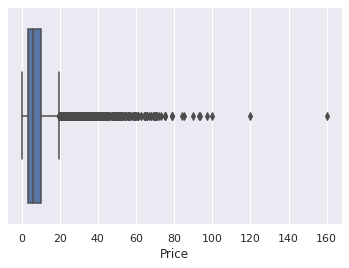

In [23]:
sns.boxplot(x=data['Price']) #Most cars are under 20 lakhs 
max_thresh,min_thresh=np.quantile(data['Price'],[0.75,0.25])
IQR=np.quantile(data['Price'],0.75)-np.quantile(data['Price'],0.25)
upper_whisker=max_thresh+1.5*IQR
lower_whisker=min_thresh-1.5*IQR
print(max_thresh,min_thresh,upper_whisker,lower_whisker)
print(data[data['Price']>upper_whisker].shape) #15% of current dataset
print(data[data['Price']<min_thresh].shape) #12% of current dataset
#bad idea to use boxplot to detect and remove outliers

(0.0, 160.0)

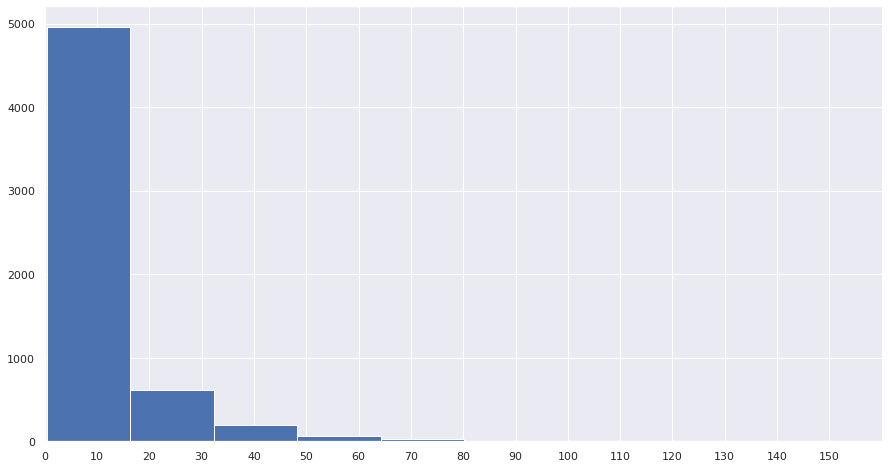

In [24]:
f,ax=plt.subplots(figsize=(15,8))
plt.hist(data['Price'],bins=10)
plt.xticks(np.arange(0,160,step=10))
plt.xlim([0,160]) 

In [25]:
max_thresh=data.Price.quantile(0.95)
min_thresh=data.Price.quantile(0.05)
print("Max threshold: ",max_thresh," Min threshold: ",min_thresh)
data=data[(data['Price']>min_thresh) & (data['Price']<max_thresh)]
data.shape #696 price outliers removed

Max threshold:  32.509  Min threshold:  1.8


(5279, 12)

## Mileage

Number of 0 mileage records:  0
Number of 30+ mileage records:  14


/home/samanway/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


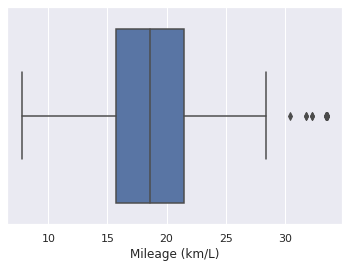

In [28]:
sns.boxplot(data['Mileage (km/L)'])
mileage_zero=data[data['Mileage (km/L)']==0].shape[0]
mileage_high=data[data['Mileage (km/L)']>30].shape[0]
print("Number of 0 mileage records: ",mileage_zero)
print("Number of 30+ mileage records: ",mileage_high)

data=data[(data['Mileage (km/L)']!=0)] 

# Engine

Number of 3000CC + cars:  32


/home/samanway/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


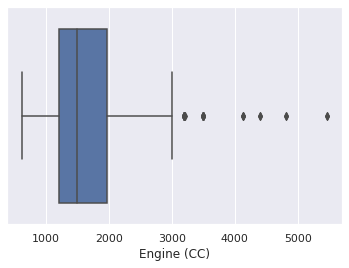

In [30]:
sns.boxplot(data['Engine (CC)'])
print("Number of 3000CC + cars: ",data[data['Engine (CC)']>3000].shape[0])
data=data[data['Engine (CC)']<3000]

# Power

Number of 200bhp+ cars:  157


/home/samanway/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


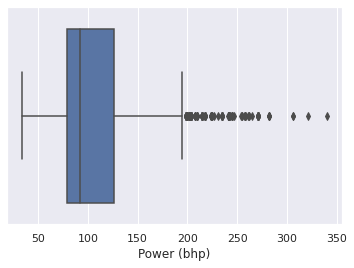

In [32]:
sns.boxplot(data['Power (bhp)'])
print("Number of 200bhp+ cars: ",data[data['Power (bhp)']>200].shape[0])
data=data[data['Power (bhp)']<200]

In [33]:
data['Fuel_Type'].describe()

count       5072
unique         4
top       Diesel
freq        2686
Name: Fuel_Type, dtype: object

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

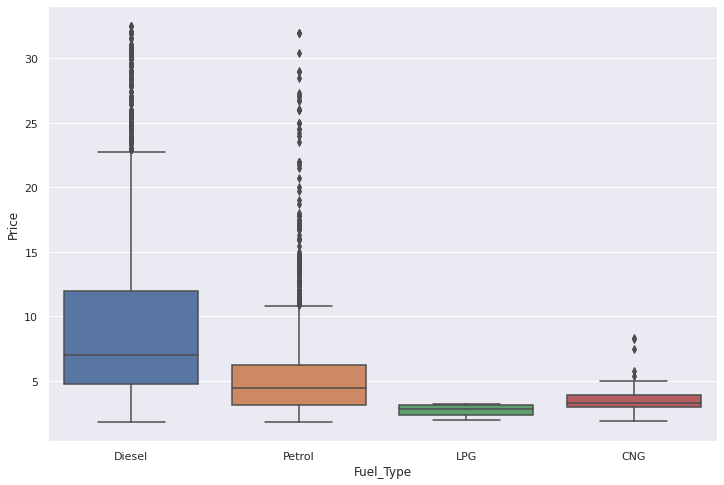

In [34]:
f,ax=plt.subplots(figsize=(12,8))
sns.boxplot(x='Fuel_Type',y='Price',data=data)
#Diesel cars cost more than Petrol cars

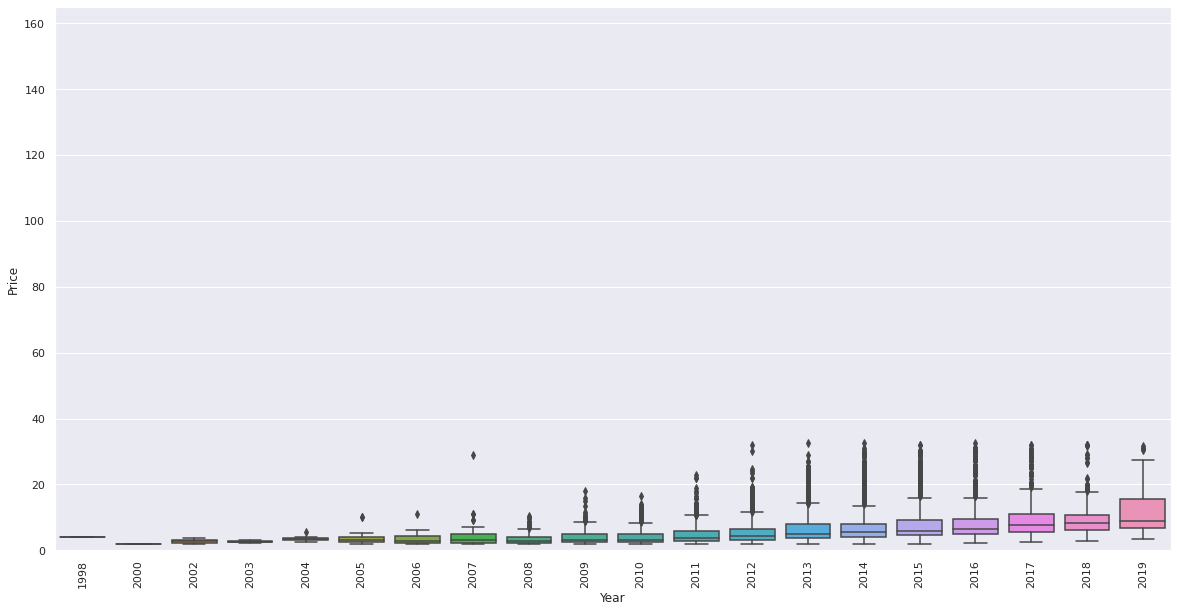

In [35]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='Year', y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);
#Newer cars costliers than older ones

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

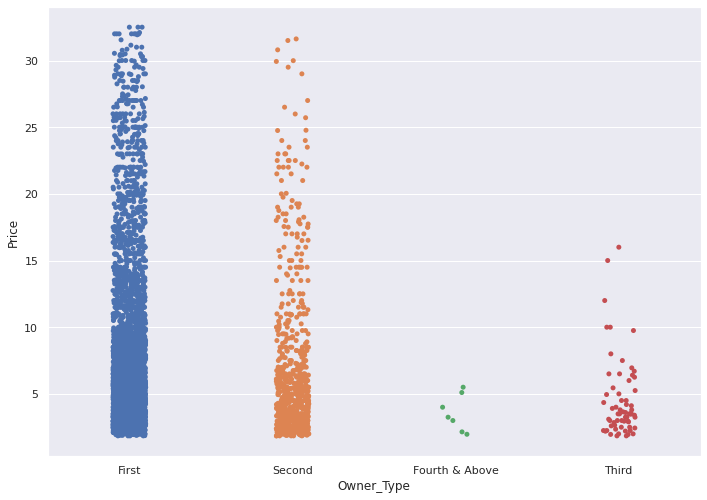

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = 'Owner_Type', y ='Price', data = data) 
#Firsthand cars cost the most as expected

<Figure size 1440x720 with 0 Axes>

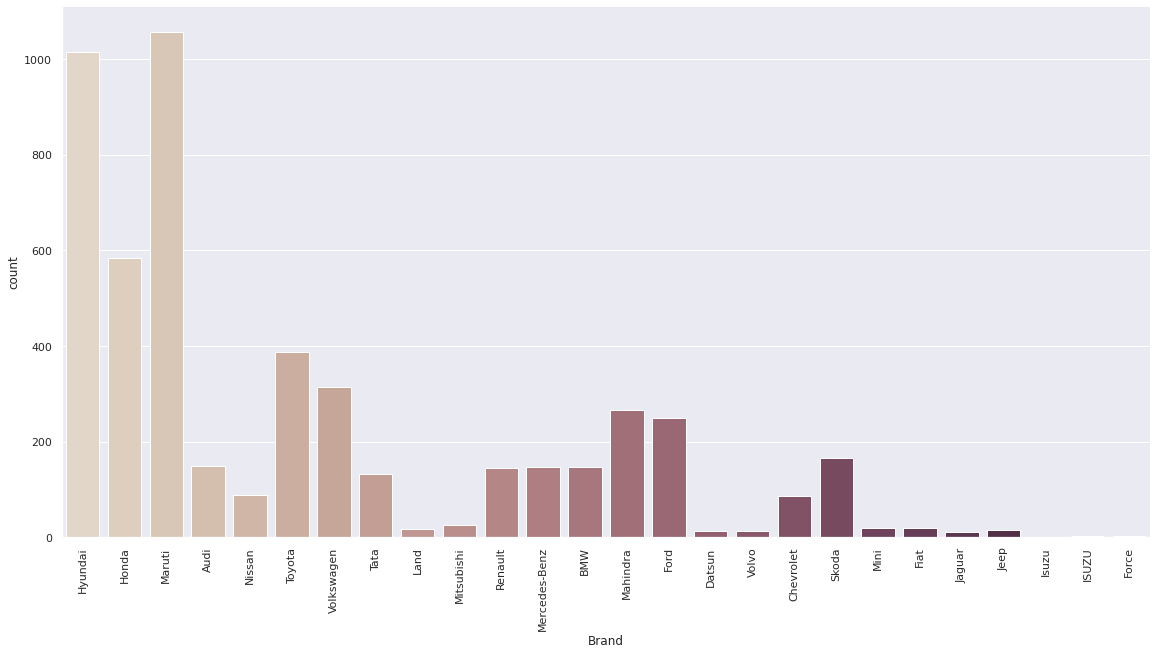

In [37]:
plt.figure(figsize=(20, 10))
sns.catplot(x='Brand', kind="count", palette="ch:.25", height=8, aspect=2, data=data);
plt.xticks(rotation=90);
#Maruti is the most common brand followed by Hyundai

In [38]:
#Handling categorical features

In [39]:
data['Location'].value_counts()

Mumbai        681
Hyderabad     631
Kochi         577
Coimbatore    511
Pune          499
Delhi         487
Kolkata       463
Chennai       400
Jaipur        333
Bangalore     291
Ahmedabad     199
Name: Location, dtype: int64

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Price
1227,Mercedes-Benz,Bangalore,2016,51944,Diesel,Automatic,First,19.27,2143.0,170.00,5.0,32.50
5278,Land,Delhi,2014,38999,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,32.50
3003,Audi,Chennai,2013,44000,Diesel,Automatic,First,14.16,1968.0,174.30,5.0,32.50
1474,Toyota,Hyderabad,2018,39927,Diesel,Manual,First,12.55,2982.0,168.50,7.0,32.10
1212,Toyota,Pune,2018,17585,Petrol,Automatic,First,19.16,2494.0,157.70,5.0,32.00
377,Mini,Bangalore,2015,20000,Petrol,Automatic,First,18.86,1598.0,122.00,4.0,32.00
872,Toyota,Pune,2018,17000,Petrol,Automatic,First,19.16,2494.0,158.20,5.0,32.00
485,Toyota,Delhi,2017,25000,Diesel,Automatic,First,12.55,2982.0,168.50,7.0,32.00
5324,Audi,Bangalore,2015,37500,Diesel,Automatic,First,17.68,1968.0,174.33,5.0,32.00
4582,Jaguar,Delhi,2012,16000,Diesel,Automatic,First,16.36,2179.0,187.70,5.0,32.00


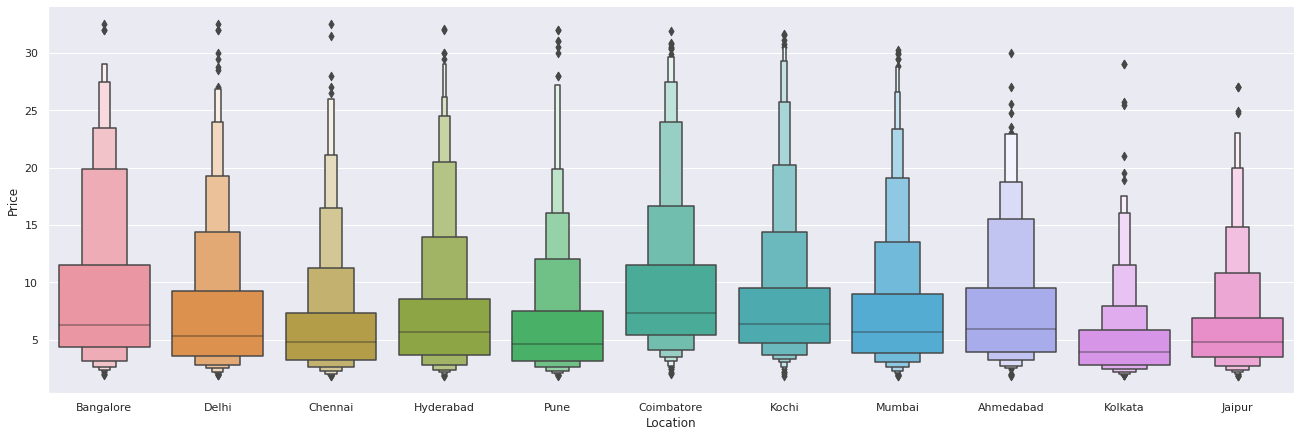

In [40]:
sns.catplot(y='Price',x='Location',data=data.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
data.sort_values('Price',ascending=False).head(20)

In [41]:
#One-hot encoding 'Location' feature as no the data is not ordinal
Location = data['Location']
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0


In [42]:
data['Fuel_Type'].value_counts()

Diesel    2686
Petrol    2325
CNG         53
LPG          8
Name: Fuel_Type, dtype: int64

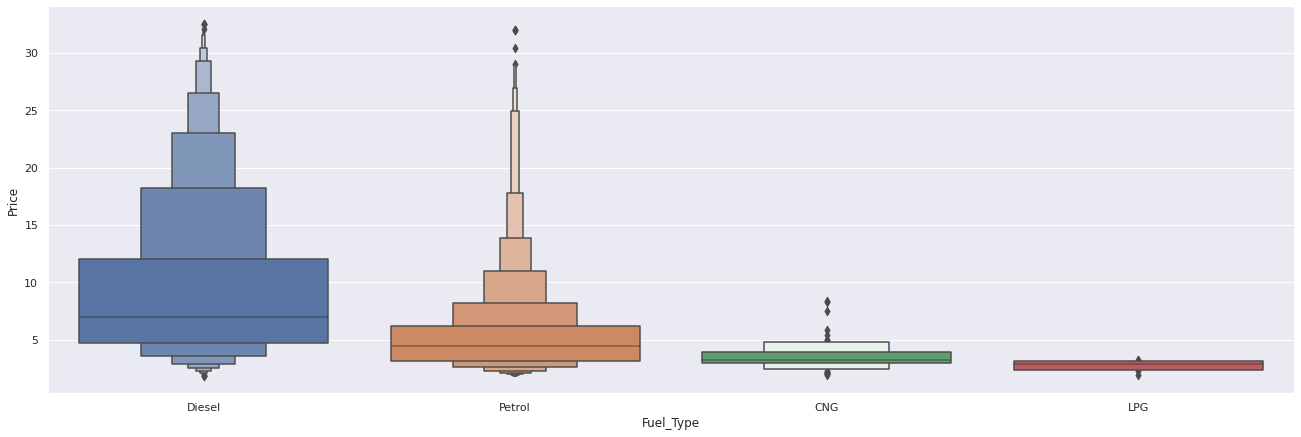

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Price
5,Hyundai,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35
906,Maruti,Hyderabad,2012,72000,LPG,Manual,First,26.20,998.0,58.20,5.0,2.85
2323,Hyundai,Hyderabad,2011,17000,LPG,Manual,First,13.45,1086.0,62.10,5.0,3.10
2373,Hyundai,Jaipur,2012,53000,LPG,Manual,Second,19.20,1086.0,68.05,5.0,2.85
2861,Hyundai,Hyderabad,2014,56000,LPG,Manual,First,13.45,1086.0,62.10,5.0,3.20
3501,Maruti,Hyderabad,2007,65047,LPG,Manual,First,17.30,1061.0,57.50,5.0,1.95
5370,Maruti,Hyderabad,2012,72389,LPG,Manual,First,26.20,998.0,58.20,5.0,3.20
5850,Maruti,Jaipur,2010,70000,LPG,Manual,First,26.20,998.0,58.20,5.0,2.27


In [43]:
sns.catplot(y="Price",x="Fuel_Type",data=data.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
plt.show()
#Diesel cars are priced the highest,followed by petrol,CNG and LPG
data[data['Fuel_Type']=='LPG']

In [44]:
Fuel=data['Fuel_Type']
Fuel=pd.get_dummies(Fuel,drop_first=True)
Fuel.head()

,Diesel,LPG,Petrol
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
5,0,1,0


In [45]:
data['Transmission'].value_counts()

Manual       3863
Automatic    1209
Name: Transmission, dtype: int64

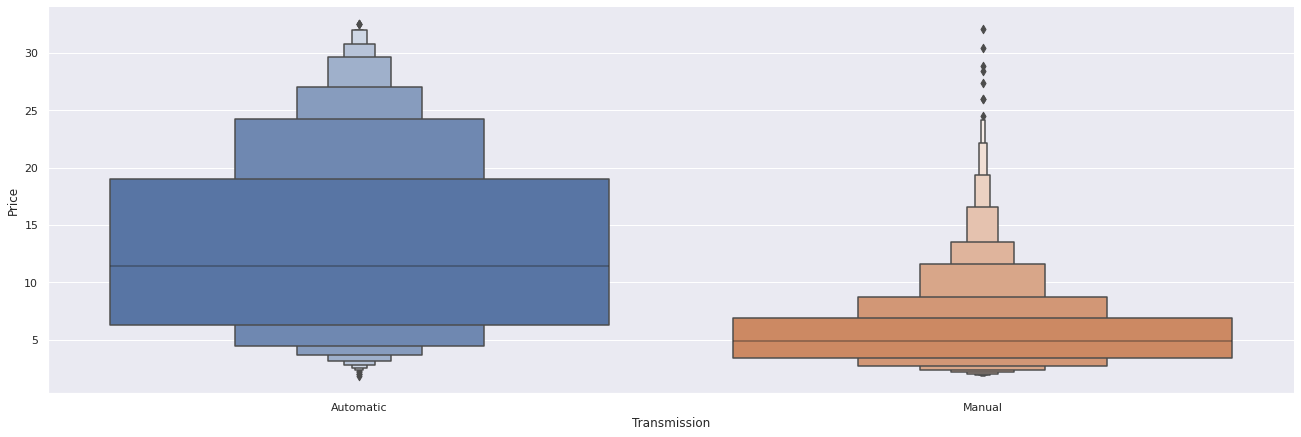

In [46]:
sns.catplot(y='Price',x='Transmission',data=data.sort_values('Price',ascending=False),kind="boxen",height=6,aspect=3)
#Automatic transmission cars are priced higher than manual

In [47]:
Trans=data['Transmission']
Trans=pd.get_dummies(Trans,drop_first=True)
Trans.head()

,Manual
1,1
2,1
3,1
4,0
5,1


In [48]:
data['Owner_Type'].value_counts()

First             4275
Second             725
Third               65
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [49]:
#Owner Type data is ordinal, we will be using Label Encoding
data.replace({"First":1,"Second":2,"Third":3,"Fourth & Above":4},inplace=True)
data.head()

,Brand,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Price
1,Hyundai,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74
5,Hyundai,Hyderabad,2012,75000,LPG,Manual,1,21.10,814.0,55.20,5.0,2.35


In [50]:
data['Brand'].value_counts()

Maruti           1057
Hyundai          1015
Honda             583
Toyota            388
Volkswagen        314
Mahindra          267
Ford              250
Skoda             165
Audi              149
BMW               147
Mercedes-Benz     147
Renault           145
Tata              133
Nissan             88
Chevrolet          87
Mitsubishi         25
Mini               20
Fiat               19
Land               17
Jeep               15
Datsun             13
Volvo              12
Jaguar             10
Force               3
ISUZU               2
Isuzu               1
Name: Brand, dtype: int64

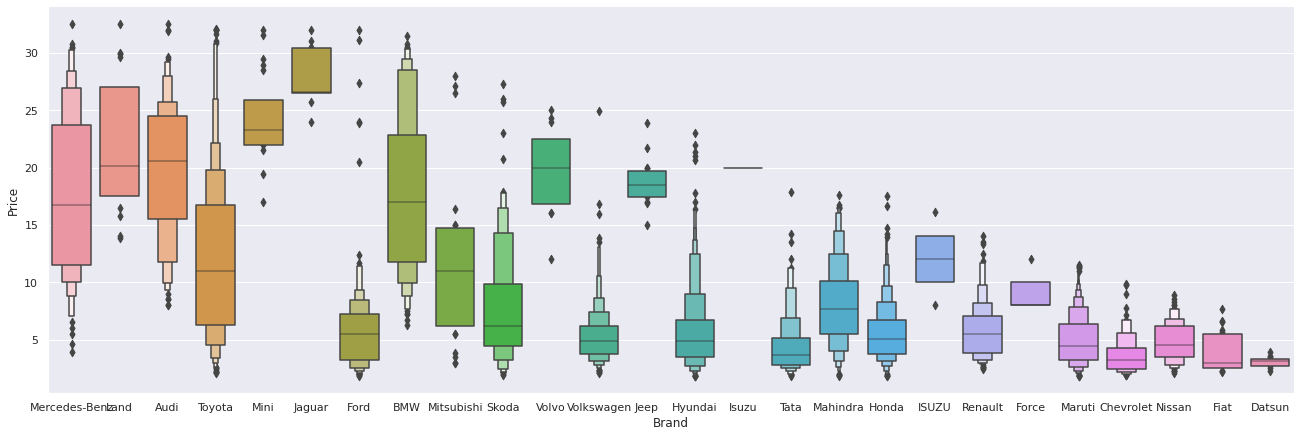

In [51]:
sns.catplot(y='Price',x='Brand',data=data.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [52]:
#Brand data has a lot of variability, and One hot encoding will make the feature list unnecessarily long
data.drop(['Brand'],axis=1,inplace=True)

In [53]:
X=pd.concat([data,Location,Fuel,Trans],axis=1)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Price
1,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74
5,Hyderabad,2012,75000,LPG,Manual,1,21.10,814.0,55.20,5.0,2.35


In [54]:
#Dropping redundant columns
y=X["Price"]
X.drop(["Location","Fuel_Type","Transmission","Price"],axis=1,inplace=True)
X.head()

,Year,Kilometers_Driven,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Bangalore,Chennai,Coimbatore,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
1,2015,41000,1,19.67,1582.0,126.20,5.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,18.20,1199.0,88.70,5.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,15.20,1968.0,140.80,5.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,2012,75000,1,21.10,814.0,55.20,5.0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [55]:
X["Kilometers_Driven"].describe() #Large range of values observed,need to scale

count      5072.000000
mean      56878.302642
std       37969.505924
min         171.000000
25%       33476.250000
50%       52514.500000
75%       72000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
X["Kilometers_Driven"]=scaling.fit_transform(X[['Kilometers_Driven']])
X.head()


,Year,Kilometers_Driven,Owner_Type,Mileage (km/L),Engine (CC),Power (bhp),Seats,Bangalore,Chennai,Coimbatore,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
1,2015,0.052694,1,19.67,1582.0,126.20,5.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,0.059147,1,18.20,1199.0,88.70,5.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,0.112062,1,20.77,1248.0,88.76,7.0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,0.052268,2,15.20,1968.0,140.80,5.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,2012,0.096575,1,21.10,814.0,55.20,5.0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [58]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage (km/L)',
       'Engine (CC)', 'Power (bhp)', 'Seats', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Diesel', 'LPG', 'Petrol', 'Manual'],
      dtype='object')

In [59]:
X.shape

(5072, 21)

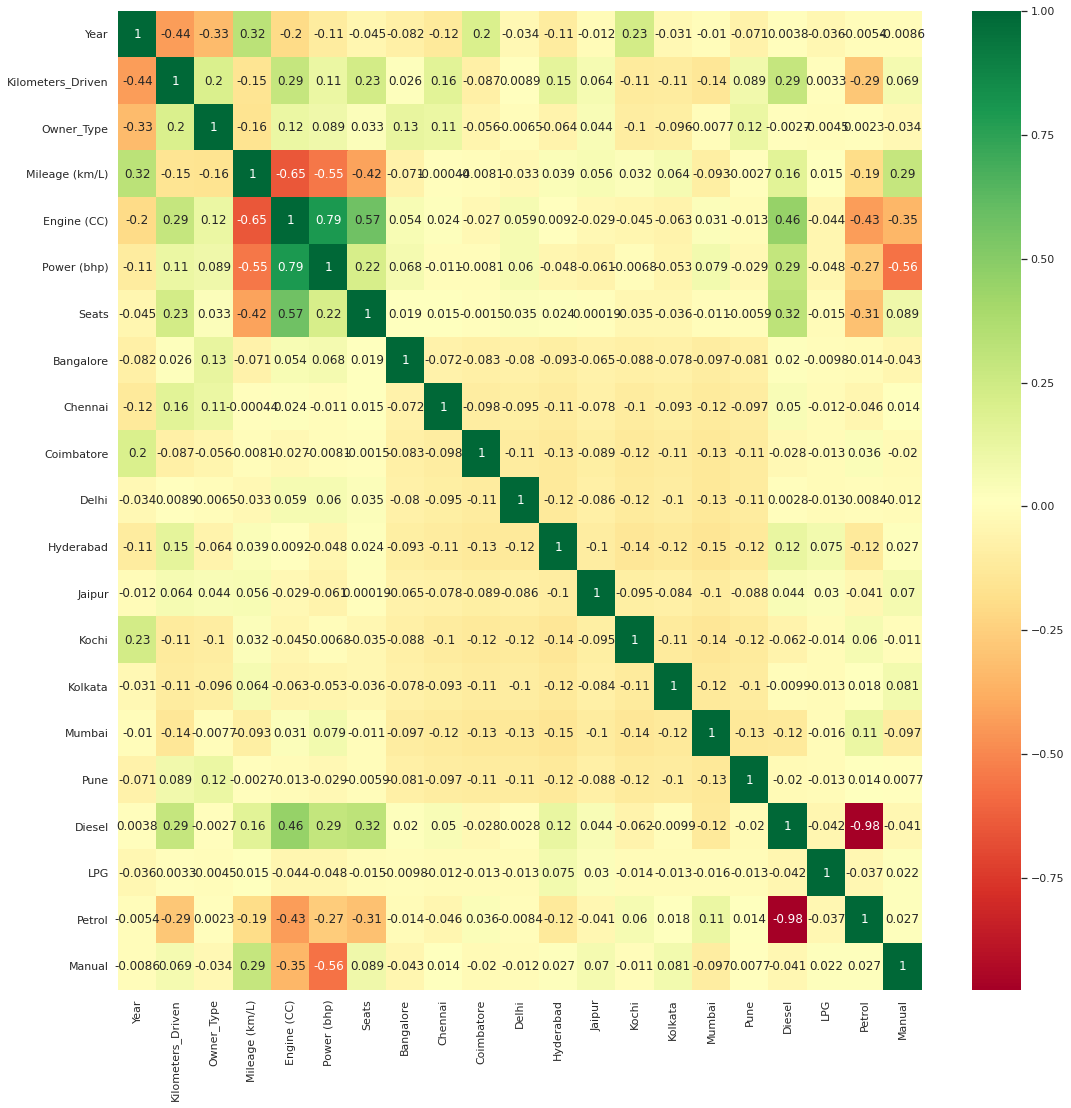

In [60]:
plt.figure(figsize=(18,18))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [61]:
#Preparing Training and Testing data
from sklearn.model_selection import cross_validate,KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [62]:
#Defining training parameters
seed=34
models=[]
models.append(('Linear Regression',LinearRegression()))
models.append(('Random Forest',RandomForestRegressor()))
models.append(('Support Vector Machine',SVR()))


#Evaluation metrics
for name,model in models:
    kfold=KFold(n_splits=10,shuffle=True,random_state=seed)
    cv_results = cross_validate(model,X,y,cv=kfold,scoring=('r2','neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'))
    print(name)
    print("Mean Absolute Error: ",-cv_results['test_neg_mean_absolute_error'].mean())
    print("Mean Squared Error: ",-cv_results['test_neg_mean_squared_error'].mean())
    print("Root Mean Squared Error: ",-cv_results['test_neg_root_mean_squared_error'].mean())
    print("R Squared Score: ",cv_results['test_r2'].mean())
    print("\n")

#RandomForestRegressor is the best model out of the 3

Linear Regression
Mean Absolute Error:  2.045212295551855
Mean Squared Error:  8.735449252717121
Root Mean Squared Error:  2.9472176366949148
R Squared Score:  0.7419447815785387


Random Forest
Mean Absolute Error:  1.014020292294177
Mean Squared Error:  3.2269970230171823
Root Mean Squared Error:  1.78654416869709
R Squared Score:  0.9040359016594339


Support Vector Machine
Mean Absolute Error:  2.9740089788928303
Mean Squared Error:  22.120562175074085
Root Mean Squared Error:  4.692296200639632
R Squared Score:  0.34595969826974615


